<a href="https://colab.research.google.com/github/A5inity/40-Day-Task-Challenge-DS-24-/blob/main/Task%204%20%3A%20X-Ray%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Credit for most of the code belongs linked article, the main difference is in the way data is read and in model training, this code uses a larger batch size with reduced image dimensions to save training time, the model is still fairly accurate.
#https://www.geeksforgeeks.org/pneumonia-detection-using-cnn-in-python/
from google.colab import files
files.upload()

In [2]:
!pip install kaggle==1.5.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73027 sha256=665d36157a4c17e0030bfd0cdf9b630f0cef1260178b0cc9e13e056b1b3df375
  Stored in directory: /root/.cache/pip/wheels/70/0c/e6/79103212a102e78b8453691b905f48000219574ba7137e7207
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.17
    Uninstalling kaggle-1.6.17:
      Successfully uninstalled kaggle-1.6.17


In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:16<00:00, 230MB/s]
100% 2.29G/2.29G [00:16<00:00, 152MB/s]


In [5]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [6]:
!ls /content


chest_xray  chest-xray-pneumonia.zip  kaggle.json  sample_data


In [7]:
!ls /content/chest_xray

chest_xray  __MACOSX  test  train  val


In [9]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg



path='/content/chest_xray/train'
classes = os.listdir(path)
print(classes)

['PNEUMONIA', 'NORMAL']


In [12]:
PNEUMONIA_dir = os.path.join(path + '/' + classes[0])
NORMAL_dir = os.path.join(path + '/' + classes[1])


pneumonia_names = os.listdir(PNEUMONIA_dir)
normal_names = os.listdir(NORMAL_dir)

print('There are ', len(pneumonia_names),
      'images of Chest infected with Pneumonia')
print('There are ', len(normal_names), 'images of a healthy chest')

There are  3875 images of pneumonia infected in training dataset
There are  1341 normal images in training dataset


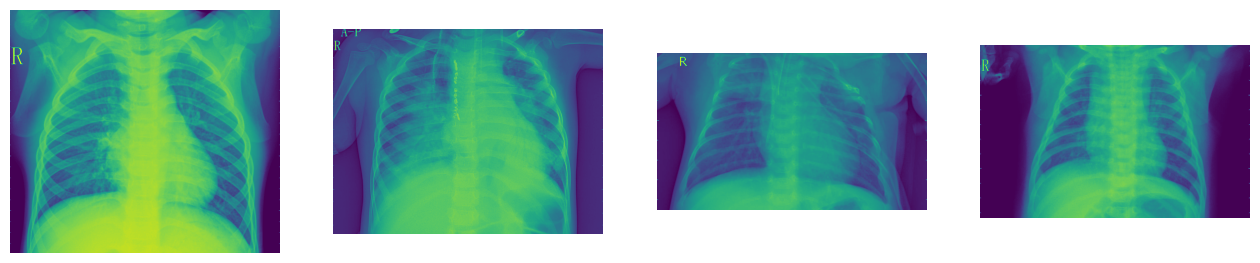

In [63]:

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(16, 8)

# Select the starting index for the images to display
pic_index = 150

# Create lists of the file paths for the 16 images to display
pneumonia_images = [os.path.join(PNEUMONIA_dir, fname)
                    for fname in pneumonia_names[pic_index-4:pic_index]]
# Loop through the image paths and display each image in a subplot
for i, img_path in enumerate(pneumonia_images):
    sp = plt.subplot(1, 4, i+1)
    sp.axis('Off')

    # Read in the image using Matplotlib's imread() function
    img = mpimg.imread(img_path)
    plt.imshow(img)

# Display the plot with the 16 images in a 4x4
plt.show()


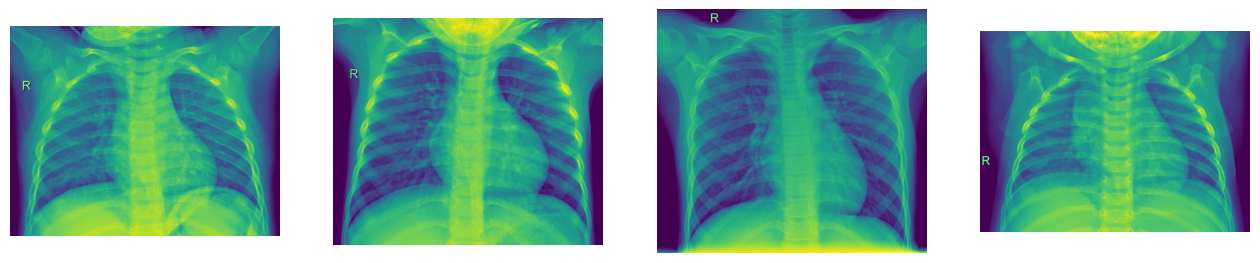

In [62]:
# Set the figure size
fig = plt.gcf()
fig.set_size_inches(16, 8)

# Select the starting index for the images to display
pic_index = 150

# Create lists of the file paths for the 16 images to display
normal_images = [os.path.join(NORMAL_dir, fname)
			for fname in normal_names[pic_index-4:pic_index]]
# Loop through the image paths and display each image in a subplot
for i, img_path in enumerate(normal_images):
	sp = plt.subplot(1, 4, i+1)
	sp.axis('Off')

	# Read in the image using Matplotlib's imread() function
	img = mpimg.imread(img_path)
	plt.imshow(img)

# Display the plot with the 16 images in a 4x4 grid
plt.show()


In [22]:
Train = keras.utils.image_dataset_from_directory(
	directory='/content/chest_xray/chest_xray/train',
	labels="inferred",
	label_mode="categorical",
	batch_size=128,
	image_size=(128, 128))
Test = keras.utils.image_dataset_from_directory(
	directory='/content/chest_xray/chest_xray/test',
	labels="inferred",
	label_mode="categorical",
	batch_size=128,
	image_size=(128, 128))
Validation = keras.utils.image_dataset_from_directory(
	directory='/content/chest_xray/chest_xray/val',
	labels="inferred",
	label_mode="categorical",
	batch_size=128,
	image_size=(128, 128))


Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [23]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(2, activation='sigmoid')
])


In [24]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 512)                 │           2,0

 Total params: 2,070,594 (7.90 MB)

 Trainable params: 2,066,498 (7.88 MB)

 Non-trainable params: 4,096 (16.00 KB)

In [25]:
model.compile(
	# specify the loss function to use during training
	loss='binary_crossentropy',
	# specify the optimizer algorithm to use during training
	optimizer='adam',
	# specify the evaluation metrics to use during training
	metrics=['accuracy']
)


In [26]:
history = model.fit(Train,
		epochs=10,
		validation_data=Validation)


Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 201s 5s/step - accuracy: 0.8512 - loss: 0.3767 - val_accuracy: 0.5000 - val_loss: 13.7076
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 194s 5s/step - accuracy: 0.9573 - loss: 0.1501 - val_accuracy: 0.5000 - val_loss: 5.5712
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 199s 5s/step - accuracy: 0.9589 - loss: 0.1319 - val_accuracy: 0.6250 - val_loss: 0.4979
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 208s 5s/step - accuracy: 0.9765 - loss: 0.0904 - val_accuracy: 0.5000 - val_loss: 4.1393
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 196s 5s/step - accuracy: 0.9611 - loss: 0.1222 - val_accuracy: 0.5000 - val_loss: 14.8366
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 201s 5s/step - accuracy: 0.9690 - loss: 0.0914 - val_accuracy: 0.6250 - val_loss: 3.1375
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 202s 5s/step - accuracy: 0.9768 - loss: 0.0704 - val_accuracy: 0.5000 - val_loss: 2.4755
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 255s 5s/step - accuracy: 0.9744 - loss: 0.0704 - val_accuracy: 0.6250 -

#Checking if a certain Chest is infected or not

In [47]:
!ls /content/chest_xray/test/PNEUMONIA | head -10

person100_bacteria_475.jpeg
person100_bacteria_477.jpeg
person100_bacteria_478.jpeg
person100_bacteria_479.jpeg
person100_bacteria_480.jpeg
person100_bacteria_481.jpeg
person100_bacteria_482.jpeg
person101_bacteria_483.jpeg
person101_bacteria_484.jpeg
person101_bacteria_485.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Pneumonia


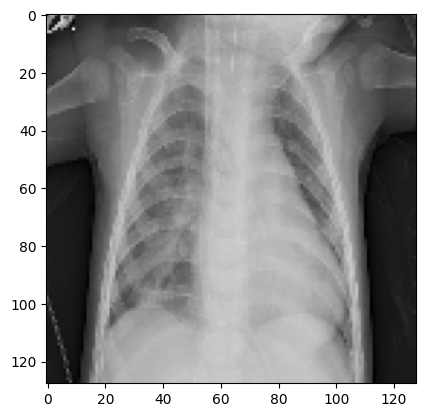

In [49]:
# Load the image from the directory
test_image = tf.keras.utils.load_img(
    "/content/chest_xray/chest_xray/test/PNEUMONIA/person90_bacteria_442.jpeg",
     target_size=(128, 128))

# Display the loaded image
plt.imshow(test_image)

# Convert the loaded image into a NumPy array
# and expand its dimensions to match the
# expected input shape of the model
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Use the trained model to make a prediction on the input image
result = model.predict(test_image)

# Extract the probability of the input
# image belonging to each class from
# the prediction result
class_probabilities = result[0]

# Determine the class with the highest
# probability and print its label
if class_probabilities[0] > class_probabilities[1]:
    print("Normal")
else:
    print("Pneumonia")


In [48]:
!ls /content/chest_xray/test/NORMAL | head -10

IM-0001-0001.jpeg
IM-0003-0001.jpeg
IM-0005-0001.jpeg
IM-0006-0001.jpeg
IM-0007-0001.jpeg
IM-0009-0001.jpeg
IM-0010-0001.jpeg
IM-0011-0001-0001.jpeg
IM-0011-0001-0002.jpeg
IM-0011-0001.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Normal


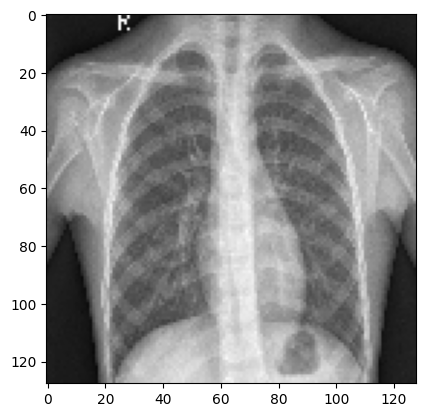

In [55]:
test_image = tf.keras.utils.load_img(
	"/content/chest_xray/chest_xray/test/NORMAL/IM-0001-0001.jpeg",
	target_size=(128, 128))

# Display the loaded image
plt.imshow(test_image)

# Convert the loaded image into a NumPy array and
# expand its dimensions to match the expected input shape of the model
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Use the trained model to make a prediction on the input image
result = model.predict(test_image)

# Extract the probability of the input image belonging
# to each class from the prediction result
class_probabilities = result[0]

# Determine the class with the highest probability and print its label
if class_probabilities[0] > class_probabilities[1]:
	print("Normal")
else:
	print("Pneumonia")
